<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

categorical features - one hot encoding \
numerical features - scaling 





<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/preprocessed_data2.csv"

In [ ]:
# data  = pd.read_csv(path, nrows=5000)
# data  = pd.read_csv(path, nrows=50000)
data  = pd.read_csv(path)


data.shape


(109248, 9)

In [ ]:
#seperating class label from dataset
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# train test split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

## 1.3 Make Data Model Ready: encoding essay


<h3>Bag of words(BOW) representation</h3>

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# min_df : ignore terms that have a document frequency strictly lower than the given threshold
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

features_list = []     # it will contain name of all the features 
features_list.extend(vectorizer.get_feature_names())     #adds feature names to list



(73196, 8) (73196,)
(36052, 8) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


In [ ]:
print(features_list)

['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '13', '14', '15', '16', '17', '18', '19', '1st', '1st grade', '20', '20 students', '2016', '2017', '21', '21st', '21st century', '21st century learners', '21st century learning', '21st century skills', '22', '23', '24', '25', '25 students', '26', '27', '28', '2nd', '2nd grade', '2nd graders', '30', '30 students', '3d', '3d printer', '3rd', '3rd grade', '3rd graders', '40', '400', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 students', '600', '6th', '6th grade', '6th graders', '70', '75', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '99', '9th', 'abilities', 'ability', 'ability learn', 'ability levels', 'able', 'able access', 'able choose', 'able control', 'a

<h3>tfidf representation</h3>

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted TfidfVectorizer to convert the text to vector
X_train_essay_tfidf = tfidf_vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = tfidf_vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

# features_essay_tfidf = vectorizer.get_feature_names()
# print(features_essay_tfidf)

(73196, 8) (73196,)
(36052, 8) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


## 1.4 Make Data Model Ready: encoding numerical, categorical feature

<h3>1.4.1 encoding categorical features: School State</h3>

In [ ]:
len(pd.unique(data['school_state']))           #https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
#after one hot encoding , each feature value  will be converted into 51 dimensions binary veector  

51

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

#one hot encoding for categorical feature
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values) 
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print("="*100)

# print(vectorizer.get_feature_names())
features_list.extend(vectorizer.get_feature_names())
print(len(features_list))


After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
5051


<h3>1.4.2 encoding categorical features: teacher_prefix</h3>

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print("="*100)

print(vectorizer.get_feature_names())
features_list.extend(vectorizer.get_feature_names())
print(len(features_list))

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
5056


<h3>1.4.3 encoding categorical features: project_grade_category</h3>

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print("="*100)

print(vectorizer.get_feature_names())
features_list.extend(vectorizer.get_feature_names())
print(len(features_list))

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
5060


<h3>1.4.4 encoding categorical features: clean_categories</h3>

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print("="*100)

print(vectorizer.get_feature_names())
features_list.extend(vectorizer.get_feature_names())
print(len(features_list))

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
5069


<h3>1.4.5 encoding categorical features: clean_subcategories</h3>

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print("="*100)

print(vectorizer.get_feature_names())
features_list.extend(vectorizer.get_feature_names())
print(len(features_list))

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
5099


<h3>1.4.6 encoding numerical features: Price</h3>

In [ ]:
# print(X_train['price'].values.reshape(-1,1))     # 1 column only
X_train['price'].values.reshape(1,-1)       # 1 row only

array([[ 33.  ,  38.23, 590.58, ..., 416.61,  89.99, 105.34]])

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()      

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
normalizer.fit(X_train['price'].values.reshape(1,-1))     #default - l2 norm    
#normalizer by default normalizes on each row , so we need to convert 'price' values such that all values are in same row

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


<h3>1.4.6 encoding numerical features: teacher_number_of_previously_posted_projects</h3>

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))    

X_train_teacher_previous_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_previous_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))



print("After vectorizations")
print(X_train_teacher_previous_projects_norm.shape, y_train.shape)
print(X_test_teacher_previous_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [ ]:
print(len(features_list))

#appending numerical featues 
features_list.append('price')
features_list.append('teacher_number_of_previously_posted_projects')
print(len(features_list))


5099
5101



## 1.5 Concatinating all the features

<h3> Set 1: categorical, numerical features + preprocessed_eassay (BOW) </h3>

In [ ]:
np.transpose( X_train_price_norm).shape

(73196, 1)

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

#we need to transpose numerical features : X_train_price_norm  ,X_test_price_norm,  X_train_teacher_previous_projects_norm  and  X_test_teacher_previous_projects_norm
X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_categories_ohe,X_train_subcategories_ohe, np.transpose(X_train_price_norm),np.transpose(X_train_teacher_previous_projects_norm))).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_categories_ohe,X_test_subcategories_ohe, np.transpose(X_test_price_norm),np.transpose(X_test_teacher_previous_projects_norm))).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


<h3>Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)</h3>

In [ ]:
from scipy.sparse import hstack

#we need to transpose numerical features 
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_categories_ohe,X_train_subcategories_ohe, np.transpose(X_train_price_norm),np.transpose(X_train_teacher_previous_projects_norm))).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_categories_ohe,X_test_subcategories_ohe, np.transpose(X_test_price_norm),np.transpose(X_test_teacher_previous_projects_norm))).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


## 1.6 Appling NB on different kind of featurization as mentioned in the instructions
<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### NB on (Set 1: categorical, numerical features + preprocessed_eassay (BOW))

<h3>1.  hyperparameter tuning </h3>

In [ ]:
# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
#annotating maximum value in plot
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.80,0.46), **kw)

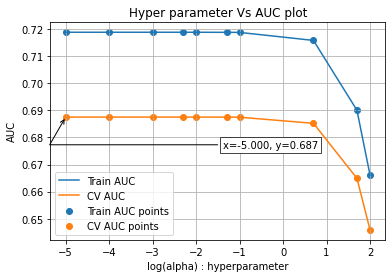

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
3,0.096893,0.003776,0.023718,0.000984,1e-05,{'alpha': 1e-05},0.680343,0.686149,0.695154,0.688332,0.687495,0.005299,1,0.719754,0.717389,0.717694,0.720289,0.718781,0.001259
6,0.097958,0.004032,0.025818,0.003263,0.0001,{'alpha': 0.0001},0.680343,0.686148,0.695154,0.688332,0.687494,0.005299,2,0.719754,0.717389,0.717694,0.720289,0.718781,0.001259
9,0.096181,0.000380,0.023342,0.000287,0.001,{'alpha': 0.001},0.680343,0.686148,0.695154,0.688332,0.687494,0.005299,3,0.719753,0.717388,0.717694,0.720289,0.718781,0.001259
0,0.099224,0.003763,0.024536,0.002117,0.005,{'alpha': 0.005},0.680341,0.686147,0.695152,0.688330,0.687492,0.005299,4,0.719751,0.717385,0.717692,0.720286,0.718778,0.001259
4,0.095406,0.000746,0.023634,0.001028,0.01,{'alpha': 0.01},0.680338,0.686145,0.695150,0.688327,0.687490,0.005299,5,0.719748,0.717382,0.717689,0.720283,0.718776,0.001259


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

naive = MultinomialNB()
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100] }
# parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100] , fit_prior =  False , 'class_prior' : [[0.5,0.5]]}
#Whenever the training dataset is highly imbalanced, you can balance it either using any one of the 
          # techniques(like upsampling or undersampling) discussed in the course (or) you can make the 
          # initializations fit_prior = False, class_prior = [0.5, 0.5] in MultinomialNB()
# You can try these initializations in both the cross-validation and the final model training phases and check if the model performance
            #  at prediction on the test data is improved.



# clf = RandomizedSearchCV(naive, parameters, cv=3, scoring='roc_auc' )
clf = RandomizedSearchCV(naive, parameters, cv=4, scoring='roc_auc' , return_train_score=  True)  
   #https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score

clf.fit(X_tr_bow, y_train)     

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
results = pd.DataFrame.from_dict(clf.cv_results_)    #clf.cv_results_ -> dictionary
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

#for plotting
alpha_list = list(alpha)
alpha_log = np.log10(alpha_list)           #converting alpha values into log values

plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')


plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha) : hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()

#for annotating max value for cv_auc
y = np.array(cv_auc)
x=np.array(alpha_log)
annot_max(x,y)

plt.show()

results.head()



#choose k such that :
# max value for CV AUC  and smaller dis bw Train AUC and CV AUC
# 14 elements in alpha but only 10 values are plotted in below plot ; random search ; i think due to n_iter

In [ ]:
# getting best value for alpha
cv_auc_max = max(cv_auc)
i = np.where(np.isclose(cv_auc, cv_auc_max))    #https://stackoverflow.com/questions/18079029/index-of-element-in-numpy-array
print(i)
print(type(i))
print(i[0][0])

print("*"*100)
print("best value for alpha :  " , alpha[i[0][0]])
best_alpha_bow = alpha[i[0][0]]


# np.argmax can be used 

(array([0, 1, 2, 3, 4]),)
<class 'tuple'>
0
****************************************************************************************************
best value for alpha :   0.005


<h3> 2. Testing the performance of the model on test data, plotting ROC Curves </h3>

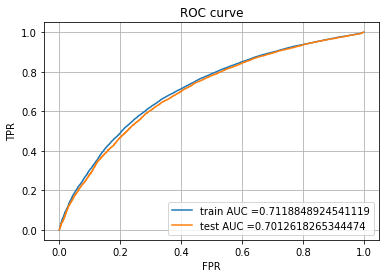

In [ ]:

naive = MultinomialNB( alpha=best_alpha_bow)
naive.fit(X_tr_bow, y_train)

# Empirical log probability of features given a class, P(x_i|y). ; will be used later in determining top features
feature_log_prob = naive.feature_log_prob_         
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
y_train_pred = naive.predict_proba(X_tr_bow)    
y_test_pred = naive.predict_proba(X_te_bow)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[: , 1])    #1st column corresponds to class 0 and 2nd column to class 1
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[: , 1])

#compute AUC using trapezoidal rule - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [ ]:
AUC_bow = auc(test_fpr, test_tpr)

In [ ]:
# we will pick a threshold that will give max value for tpr*(1-fpr)

def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
def print_cm(confusion_matrix):
  t = PrettyTable(['', 'Predicted : No' , 'Predicte : YES'])
  t.add_row(['Actual : NO', confusion_matrix[0][0] , confusion_matrix[0][1]])
  t.add_row(['Actual : YES', confusion_matrix[1][0] , confusion_matrix[1][1]])
  print(t)


#confusion matrix heatmap
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def cf_matrix_heatmap(cf_matrix):
  group_names = ["true Neg","false Pos","false Neg","true Pos"]
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

  labels = [f'{v1}\n{v2} ' for v1, v2 in  zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')



In [ ]:
# from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred[: , 1], best_t))

cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred[: , 1], best_t))




the maximum value of tpr*(1-fpr) 0.4390713273309437 for threshold 0.81


Train confusion matrix
+--------------+----------------+----------------+
|              | Predicted : No | Predicte : YES |
+--------------+----------------+----------------+
| Actual : NO  |      7382      |      3701      |
| Actual : YES |     21168      |     40945      |
+--------------+----------------+----------------+


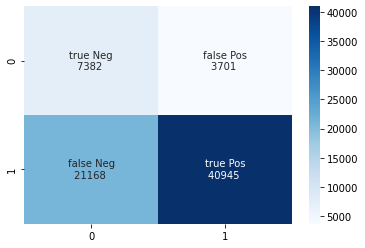

In [ ]:
print("Train confusion matrix")
print_cm(cm_train)
cf_matrix_heatmap(cm_train)

Test confusion matrix
+--------------+----------------+----------------+
|              | Predicted : No | Predicte : YES |
+--------------+----------------+----------------+
| Actual : NO  |      3553      |      1906      |
| Actual : YES |     10550      |     20043      |
+--------------+----------------+----------------+


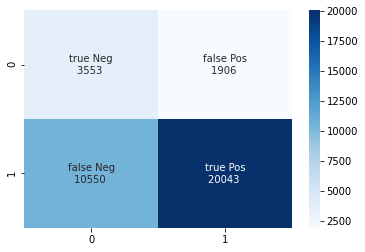

In [ ]:

print("Test confusion matrix")
print_cm(cm_test)
cf_matrix_heatmap(cm_test)


### NB on (Set 2: categorical, numerical features + preprocessed_eassay (TFIDF))

most of the code is same as above 

<h3>1.  hyperparameter tuning </h3>

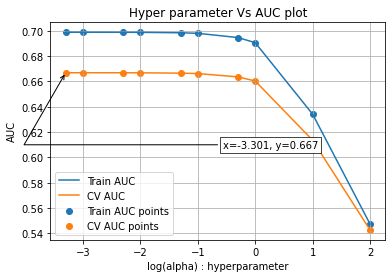

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
4,0.092290,0.000416,0.023459,0.000927,0.0005,{'alpha': 0.0005},0.660516,0.665639,0.674350,0.667090,0.666899,0.004947,1,0.698431,0.697687,0.697770,0.701613,0.698875,0.001607
1,0.097034,0.004791,0.025065,0.003266,0.001,{'alpha': 0.001},0.660513,0.665636,0.674346,0.667086,0.666895,0.004947,2,0.698427,0.697683,0.697766,0.701608,0.698871,0.001606
3,0.094097,0.000184,0.024385,0.002440,0.005,{'alpha': 0.005},0.660488,0.665615,0.674317,0.667058,0.666870,0.004945,3,0.698395,0.697649,0.697733,0.701572,0.698837,0.001605
0,0.095355,0.006624,0.023493,0.000636,0.01,{'alpha': 0.01},0.660455,0.665587,0.674282,0.667019,0.666836,0.004944,4,0.698354,0.697606,0.697693,0.701527,0.698795,0.001604
5,0.092021,0.000933,0.022955,0.000233,0.05,{'alpha': 0.05},0.660202,0.665370,0.673982,0.666732,0.666572,0.004923,5,0.698035,0.697266,0.697354,0.701165,0.698455,0.001593


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


naive = MultinomialNB()
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

clf = RandomizedSearchCV(naive, parameters, cv=4, scoring='roc_auc' , return_train_score=  True)     #https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score

clf.fit(X_tr_tfidf, y_train)     

results = pd.DataFrame.from_dict(clf.cv_results_)    
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

#for plotting
alpha_list = list(alpha)
alpha_log = np.log10(alpha_list)          #converting alpha values into log values

plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')

plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')




plt.legend()
plt.xlabel("log(alpha) : hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()

#for annotating max value for cv_auc
y = np.array(cv_auc)
x=np.array(alpha_log)
annot_max(x,y)

plt.show()

results.head()




In [ ]:
# print(max(cv_auc))
cv_auc_max = max(cv_auc)
i = np.where(np.isclose(cv_auc, cv_auc_max))      #https://stackoverflow.com/questions/18079029/index-of-element-in-numpy-array
print(i)
print(type(i))
print(i[0][0])

print("*"*100)
print("best value for alpha :  " , alpha[i[0][0]])
best_alpha_tfidf = alpha[i[0][0]]

(array([0, 1]),)
<class 'tuple'>
0
****************************************************************************************************
best value for alpha :   0.01


<h3> 2. Testing the performance of the model on test data, plotting ROC Curves </h3>

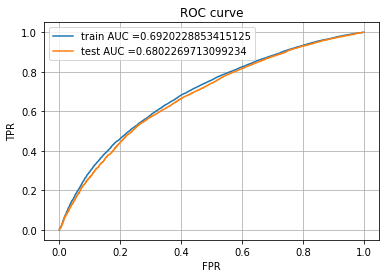

In [ ]:

naive = MultinomialNB( alpha=best_alpha_tfidf)
naive.fit(X_tr_tfidf, y_train)


y_train_pred = naive.predict_proba(X_tr_tfidf)    
y_test_pred = naive.predict_proba(X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[: , 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[: , 1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [ ]:
AUC_tfidf  =auc(test_fpr, test_tpr)

In [ ]:
#functions already defined earlier

# # we will pick a threshold that will give max value for tpr*(1-fpr)

# def find_best_threshold(threshold, fpr, tpr):
#     t = threshold[np.argmax(tpr*(1-fpr))]
#     # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
#     print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
#     return t

# def predict_with_best_t(proba, threshold):
#     predictions = []
#     for i in proba:
#         if i>=threshold:
#             predictions.append(1)
#         else:
#             predictions.append(0)
#     return predictions

# #confusion matrix heatmap
# # https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# def cf_matrix_heatmap(cf_matrix):
#   group_names = ["true Neg","false Pos","false Neg","true Pos"]
#   group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

#   labels = [f'{v1}\n{v2} ' for v1, v2 in  zip(group_names,group_counts)]
#   labels = np.asarray(labels).reshape(2,2)
#   sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# from prettytable import PrettyTable
# def print_cm(confusion_matrix):
#   t = PrettyTable(['', 'Predicted : No' , 'Predicte : YES'])
#   t.add_row(['Actual : NO', confusion_matrix[0][0] , confusion_matrix[0][1]])
#   t.add_row(['Actual : YES', confusion_matrix[1][0] , confusion_matrix[1][1]])
#   print(t)

In [ ]:
# from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred[: , 1], best_t))

cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred[: , 1], best_t))




the maximum value of tpr*(1-fpr) 0.41225126708208004 for threshold 0.849


Train confusion matrix
+--------------+----------------+----------------+
|              | Predicted : No | Predicte : YES |
+--------------+----------------+----------------+
| Actual : NO  |      7276      |      3807      |
| Actual : YES |     23109      |     39004      |
+--------------+----------------+----------------+


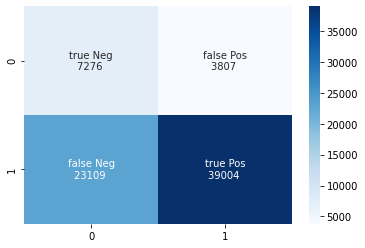

In [ ]:
print("Train confusion matrix")
print_cm(cm_train)
cf_matrix_heatmap(cm_train)

Test confusion matrix
+--------------+----------------+----------------+
|              | Predicted : No | Predicte : YES |
+--------------+----------------+----------------+
| Actual : NO  |      3506      |      1953      |
| Actual : YES |     11543      |     19050      |
+--------------+----------------+----------------+


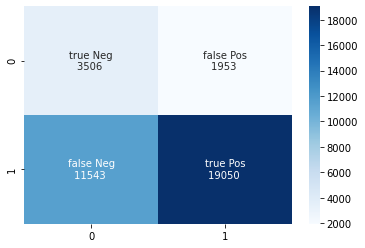

In [ ]:

print("Test confusion matrix")
print_cm(cm_test)
cf_matrix_heatmap(cm_test)


## 1.7 finding top featues

### finding top 20 features (for NB on set 1)

In [ ]:
# print(feature_log_prob)
print(feature_log_prob.shape)
print(feature_log_prob[1])   #all log probabilities belonging to positive class

(2, 5101)
[-10.01428207  -8.55622853  -7.95211041 ...  -9.49516166 -11.30286257
 -11.72809975]


In [ ]:
indices_negative_class_prob= np.argsort(feature_log_prob[0])[::-1][:20]  # 
# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html  ; considering only top 20 features
indices_positive_class_prob= np.argsort(feature_log_prob[1])[::-1][:20]


In [ ]:
#corresponding feature names 

print(type(features_list))
features_list = np.array(features_list)
print(type(features_list))


<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
#using fancy indexing

print("top  20 featue for negative class: ")
print(features_list[indices_negative_class_prob])

print("*"*100)

print("top  20 featue for positive class: ")
print(features_list[indices_positive_class_prob])


top  20 featue for negative class: 
['students' 'school' 'learning' 'my' 'classroom' 'not' 'learn' 'they'
 'help' 'the' 'my students' 'nannan' 'many' 'we' 'need' 'work' 'come'
 'love' 'able' 'day']
****************************************************************************************************
top  20 featue for positive class: 
['students' 'school' 'my' 'learning' 'classroom' 'the' 'they' 'not'
 'my students' 'learn' 'help' 'many' 'nannan' 'we' 'need' 'work' 'reading'
 'use' 'love' 'day']


# 3.Summary

<br> as mentioned in the step 5 of instructions

In [ ]:
# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer', 'Model' , 'Hyper parameter' , 'AUC'])
t.add_row(['BOW', 'Naive Bayes' ,best_alpha_bow , AUC_bow])
t.add_row(['TFIDF', 'Naive Bayes',best_alpha_tfidf , AUC_tfidf])
print(t)

+------------+-------------+-----------------+--------------------+
| Vectorizer |    Model    | Hyper parameter |        AUC         |
+------------+-------------+-----------------+--------------------+
|    BOW     | Naive Bayes |      0.005      | 0.7012618265344474 |
|   TFIDF    | Naive Bayes |       0.01      | 0.6802269713099234 |
+------------+-------------+-----------------+--------------------+
